In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd

In [ ]:
DatasetBaseFolder = '/content/gdrive/MyDrive/Colab Notebooks/PANDAST/DATASET/'

In [ ]:
movies_df = pd.read_csv(DatasetBaseFolder+"IMDB-Movie-Data.csv", index_col="Title")

In [ ]:
movies_df.head(5)

,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Guardians of the Galaxy,1,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
Suicide Squad,5,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [ ]:
movies_df.tail(5)

,Rank,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Title,,,,,,,,,,,
Secret in Their Eyes,996,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
Hostel: Part II,997,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
Step Up 2: The Streets,998,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
Search Party,999,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0
Nine Lives,1000,"Comedy,Family,Fantasy",A stuffy businessman finds himself trapped ins...,Barry Sonnenfeld,"Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...",2016,87,5.3,12435,19.64,11.0


In [ ]:
movies_df.shape

(1000, 11)

In [ ]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, Guardians of the Galaxy to Nine Lives
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Genre               1000 non-null   object 
 2   Description         1000 non-null   object 
 3   Director            1000 non-null   object 
 4   Actors              1000 non-null   object 
 5   Year                1000 non-null   int64  
 6   Runtime (Minutes)   1000 non-null   int64  
 7   Rating              1000 non-null   float64
 8   Votes               1000 non-null   int64  
 9   Revenue (Millions)  872 non-null    float64
 10  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(4)
memory usage: 93.8+ KB


In [ ]:
#removing duplicate data
movies_df = movies_df.drop_duplicates(keep = 'first') 

In [ ]:
movies_df.columns

Index(['Rank', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [ ]:
#renaming columns
movies_df.rename(columns = {'Runtime (Minutes)' : 'Runtime', 'Revenue (Millions)' : 'Revenue_millions'}, inplace=True)
movies_df.columns

Index(['Rank', 'Genre', 'Description', 'Director', 'Actors', 'Year', 'Runtime',
       'Rating', 'Votes', 'Revenue_millions', 'Metascore'],
      dtype='object')

In [ ]:
#counting null entries in each column
movies_df.isnull().sum()

Rank                  0
Genre                 0
Description           0
Director              0
Actors                0
Year                  0
Runtime               0
Rating                0
Votes                 0
Revenue_millions    128
Metascore            64
dtype: int64

In [ ]:
#To drop instances with null values
movies_dfTmp = movies_df.dropna(axis=0)
movies_dfTmp.shape

(838, 11)

In [ ]:
#To drop columns containing null values
movies_dfTmp = movies_df.dropna(axis=1) 
movies_dfTmp.shape

(1000, 9)

In [ ]:
movies_df.shape

(1000, 11)

In [ ]:
#Pick movies with rating more than 8.5
rating = movies_df['Rating']
rating[rating.gt(8.5)]

Title
Interstellar        8.6
The Dark Knight     9.0
Inception           8.8
Kimi no na wa       8.6
Dangal              8.8
The Intouchables    8.6
Name: Rating, dtype: float64

In [ ]:
#Describe the Dataset
movies_df.describe()

,Rank,Year,Runtime,Rating,Votes,Revenue_millions,Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


In [ ]:
#slicing along columns
subset = movies_df[['Genre', 'Rating']]
type(subset)

pandas.core.frame.DataFrame

In [ ]:
subset

,Genre,Rating
Title,,
Guardians of the Galaxy,"Action,Adventure,Sci-Fi",8.1
Prometheus,"Adventure,Mystery,Sci-Fi",7.0
Split,"Horror,Thriller",7.3
Sing,"Animation,Comedy,Family",7.2
Suicide Squad,"Action,Adventure,Fantasy",6.2
...,...,...
Secret in Their Eyes,"Crime,Drama,Mystery",6.2
Hostel: Part II,Horror,5.5
Step Up 2: The Streets,"Drama,Music,Romance",6.2


In [ ]:
#Slicing along rows
movies_df.loc['Sing'] #using key index

Rank                                                                4
Genre                                         Animation,Comedy,Family
Description         In a city of humanoid animals, a hustling thea...
Director                                         Christophe Lourdelet
Actors              Matthew McConaughey,Reese Witherspoon, Seth Ma...
Year                                                             2016
Runtime                                                           108
Rating                                                            7.2
Votes                                                           60545
Revenue_millions                                               270.32
Metascore                                                          59
Name: Sing, dtype: object

In [ ]:
movies_df.iloc[10] #using numerical index

Rank                                                               11
Genre                                        Adventure,Family,Fantasy
Description         The adventures of writer Newt Scamander in New...
Director                                                  David Yates
Actors              Eddie Redmayne, Katherine Waterston, Alison Su...
Year                                                             2016
Runtime                                                           133
Rating                                                            7.5
Votes                                                          232072
Revenue_millions                                               234.02
Metascore                                                          66
Name: Fantastic Beasts and Where to Find Them, dtype: object

In [ ]:
movies_df.iloc[1:4]

,Rank,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue_millions,Metascore
Title,,,,,,,,,,,
Prometheus,2,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
Split,3,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
Sing,4,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0


In [ ]:
#movies based on Director and Rating
Ridley = movies_df[(movies_df['Director'] == "Christopher Nolan") & movies_df['Rating'].gt(8.5)]
Ridley

,Rank,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue_millions,Metascore
Title,,,,,,,,,,,
Interstellar,37,"Adventure,Drama,Sci-Fi",A team of explorers travel through a wormhole ...,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",2014,169,8.6,1047747,187.99,74.0
The Dark Knight,55,"Action,Crime,Drama",When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0
Inception,81,"Action,Adventure,Sci-Fi","A thief, who steals corporate secrets through ...",Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellen...",2010,148,8.8,1583625,292.57,74.0


In [ ]:
#movies released between 2000 and 2010, have a rating above 8.0, but made below the 25th percentile in revenue.
movies_df[
    ((movies_df['Year'] >= 2000) & (movies_df['Year'] <= 2010))
    & (movies_df['Rating'] > 8.0)
    & (movies_df['Revenue_millions'] < movies_df['Revenue_millions'].quantile(0.25))
]

,Rank,Genre,Description,Director,Actors,Year,Runtime,Rating,Votes,Revenue_millions,Metascore
Title,,,,,,,,,,,
3 Idiots,431,"Comedy,Drama",Two friends are searching for their long lost ...,Rajkumar Hirani,"Aamir Khan, Madhavan, Mona Singh, Sharman Joshi",2009,170,8.4,238789,6.52,67.0
The Lives of Others,477,"Drama,Thriller","In 1984 East Berlin, an agent of the secret po...",Florian Henckel von Donnersmarck,"Ulrich Mühe, Martina Gedeck,Sebastian Koch, Ul...",2006,137,8.5,278103,11.28,89.0
Incendies,714,"Drama,Mystery,War",Twins journey to the Middle East to discover t...,Denis Villeneuve,"Lubna Azabal, Mélissa Désormeaux-Poulin, Maxim...",2010,131,8.2,92863,6.86,80.0
Taare Zameen Par,992,"Drama,Family,Music",An eight-year-old boy is thought to be a lazy ...,Aamir Khan,"Darsheel Safary, Aamir Khan, Tanay Chheda, Sac...",2007,165,8.5,102697,1.20,42.0


In [ ]:
import matplotlib.pyplot as plot
plot.rcParams.update({'font.size': 20, 'figure.figsize': (10, 8)})

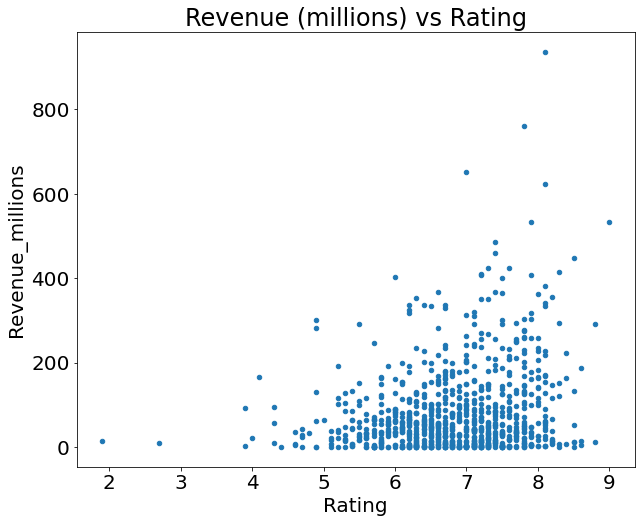

In [ ]:
#Scatter graph of revenue vs rating
movies_df.plot(kind='scatter', x='Rating', y='Revenue_millions', title='Revenue (millions) vs Rating');